In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('MyResult_2018629 (2).csv')

In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,redshift,class
0,1237646798137787833,121.748271,0.891010,23.74677,22.75365,21.10284,20.06169,19.50690,0.579273,GALAXY
1,1237646798137788079,121.708487,0.874751,23.15607,22.95075,20.89328,19.71096,19.10471,0.772647,GALAXY
2,1237646798137852371,121.820752,0.931990,19.37035,17.34262,16.35286,15.92400,15.58903,0.101993,GALAXY
3,1237646798137852646,121.910430,0.896389,23.42736,22.81119,20.27570,19.14886,18.67588,0.585733,GALAXY
4,1237646798137852889,121.825840,0.863746,21.72033,21.13090,20.98824,20.97449,20.63103,2.536449,QSO


In [4]:
len(df[df['class']=='GALAXY'])

55063

In [5]:
phot = df.drop(['objid', 'ra', 'dec', 'redshift'], axis=1)
phot['u-g'] = phot['u'] - phot['g']
phot['g-r'] = phot['g'] - phot['r']
phot['r-i'] = phot['r'] - phot['i']
phot['i-z'] = phot['i'] - phot['z']
phot.drop(['u','g','r','i','z'], axis=1, inplace=True)

X = phot.drop('class', axis=1)
y = phot['class'].copy()

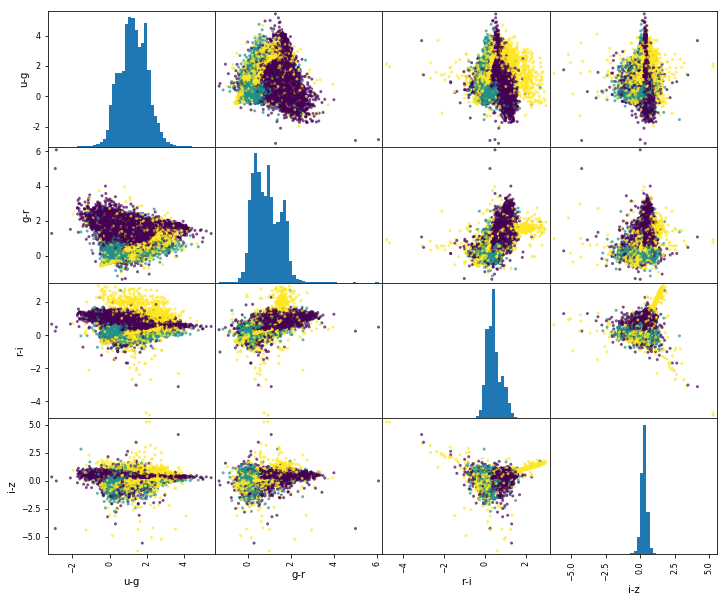

In [19]:
y_encoded, y_categories = y.factorize()
pd.plotting.scatter_matrix(X, c=y_encoded, alpha=.7,
                           hist_kwds={'bins':50},
                           figsize=(12,10))
# handles = [plt.plot([],[],
#                     color=plt.cm.Paired(i/float(len(y_encoded))),
#                     ls="", marker="o",
#                     markersize=np.sqrt(10))[0]
#            for i in range(len(y_encoded))]
# labels=y_encoded
# plt.legend(handles, labels, loc=(1.02,0))

plt.show()

In [7]:
split = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=137)
for train_index, test_index in split.split(phot, phot['class']):
    strat_train_set = phot.loc[train_index]
    strat_test_set = phot.loc[test_index]
X_train, X_test = strat_train_set.drop('class', axis=1), strat_test_set.drop('class', axis=1)
y_train, y_test = strat_train_set['class'].copy(), strat_test_set['class'].copy()

In [8]:
sgd_clf = SGDClassifier(random_state=13)
sgd_clf.fit(X_train, y_train)

/Users/devincunningham/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=13, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [9]:
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')

array([0.8400725 , 0.84019749, 0.82525   , 0.81817614, 0.83267704])

In [17]:
cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy')

array([0.84214473, 0.83264592, 0.81425   , 0.817375  , 0.819375  ,
       0.827875  , 0.835375  , 0.833875  , 0.84523065, 0.83060383])

In [11]:
cross_val_score(sgd_clf, X_train, y_train, cv=15, scoring='accuracy')

array([0.80112465, 0.81237113, 0.79662605, 0.80896138, 0.80427447,
       0.79640045, 0.81833521, 0.83236452, 0.81905119, 0.82336396,
       0.83908477, 0.83252063, 0.8495874 , 0.84002251, 0.8312078 ])

In [12]:
some_number = 10
for some_number in range(100):
    if sgd_clf.predict([X.iloc[some_number]])[0] == True:
        print some_number, y.iloc[some_number], sgd_clf.predict([X.iloc[some_number]])

In [13]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=15)

In [14]:
confusion_matrix(y_train, y_train_pred)

array([[41732,  1036,  1282],
       [ 1478, 10154,  2036],
       [ 6125,  2415, 13742]])